In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xlrd
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

In [851]:
# Import the data with USD currency only
df = pd.read_csv('Cleaning/cleaned_data_with_usd.csv')
df.head()

,artist,auction_date,auction_house,auction_location,auction_lot,category,country,created,currency,dated,edition,foundry,height,high_estimate,inscribed,low_estimate,medium,sales_price,signed,stamped,title,width,aspect_ratio,area,sold,sales_price_usd,low_estimate_usd,high_estimate_usd
0,Huang Binhong,2017-05-30,Christies,Hong Kong,1364,paper,China,1947-01-01 00:00:00,USD,0.0,NaN,NaN,33.66,64150.0,1.0,38490.0,watercolor and ink / paper,45900.0,1.0,0.0,Misty Landscape,16.93,1.99,569.86,1,45900.0,38490.0,64150.0
1,Huang Binhong,2017-05-30,Christies,Hong Kong,1365,paper,China,1990-01-01 00:00:00,USD,0.0,NaN,NaN,13.58,64150.0,1.0,38490.0,watercolor and ink / paper,0.0,1.0,0.0,Conversations in the Mountain,10.43,1.30,141.64,0,0.0,38490.0,64150.0
2,Yun Tang,2017-05-30,Christies,Hong Kong,1366,paper,NaN,NaN,USD,0.0,NaN,NaN,NaN,23090.0,1.0,15400.0,watercolor and ink / paper,22950.0,1.0,0.0,Peony and Insects / Peony and Butterfly (2),NaN,NaN,NaN,1,22950.0,15400.0,23090.0
3,Huang Binhong,2017-05-30,Christies,Hong Kong,1367,paper,China,NaN,USD,0.0,NaN,NaN,40.94,449050.0,1.0,320750.0,watercolor and ink / paper,433330.0,1.0,0.0,Retreat in the Mountains,15.55,2.63,636.62,1,433330.0,320750.0,449050.0
4,Yun Tang,2017-05-30,Christies,Hong Kong,1368,paper,NaN,1940-01-01 00:00:00,USD,0.0,NaN,NaN,39.53,12830.0,1.0,10260.0,watercolor and ink / paper,12240.0,1.0,0.0,Villagers in the Woods,18.82,2.10,743.95,1,12240.0,10260.0,12830.0


In [852]:
#get the mean of the sold column
mean_sold = df['sold'].mean()
mean_sold

0.9516051007178932

In [853]:
#proportion of 0 values in the sales price column
df['sold'].value_counts(normalize=True)

1    0.951605
0    0.048395
Name: sold, dtype: float64

In [854]:
# First stage could be logistic regression to predict if the piece is sold or not
# Add target variable column, if the sales_price_usd is 0, then the piece is not sold
#df['sold'] = np.where(df['sales_price_usd'] == 0, 0, 1)

# You addded this is cleaning file so not needed anymore

df.head()

,artist,auction_date,auction_house,auction_location,auction_lot,category,country,created,currency,dated,edition,foundry,height,high_estimate,inscribed,low_estimate,medium,sales_price,signed,stamped,title,width,aspect_ratio,area,sold,sales_price_usd,low_estimate_usd,high_estimate_usd
0,Huang Binhong,2017-05-30,Christies,Hong Kong,1364,paper,China,1947-01-01 00:00:00,USD,0.0,NaN,NaN,33.66,64150.0,1.0,38490.0,watercolor and ink / paper,45900.0,1.0,0.0,Misty Landscape,16.93,1.99,569.86,1,45900.0,38490.0,64150.0
1,Huang Binhong,2017-05-30,Christies,Hong Kong,1365,paper,China,1990-01-01 00:00:00,USD,0.0,NaN,NaN,13.58,64150.0,1.0,38490.0,watercolor and ink / paper,0.0,1.0,0.0,Conversations in the Mountain,10.43,1.30,141.64,0,0.0,38490.0,64150.0
2,Yun Tang,2017-05-30,Christies,Hong Kong,1366,paper,NaN,NaN,USD,0.0,NaN,NaN,NaN,23090.0,1.0,15400.0,watercolor and ink / paper,22950.0,1.0,0.0,Peony and Insects / Peony and Butterfly (2),NaN,NaN,NaN,1,22950.0,15400.0,23090.0
3,Huang Binhong,2017-05-30,Christies,Hong Kong,1367,paper,China,NaN,USD,0.0,NaN,NaN,40.94,449050.0,1.0,320750.0,watercolor and ink / paper,433330.0,1.0,0.0,Retreat in the Mountains,15.55,2.63,636.62,1,433330.0,320750.0,449050.0
4,Yun Tang,2017-05-30,Christies,Hong Kong,1368,paper,NaN,1940-01-01 00:00:00,USD,0.0,NaN,NaN,39.53,12830.0,1.0,10260.0,watercolor and ink / paper,12240.0,1.0,0.0,Villagers in the Woods,18.82,2.10,743.95,1,12240.0,10260.0,12830.0


In [855]:
#Define feature to use for now
df.columns

Index(['artist', 'auction_date', 'auction_house', 'auction_location',
       'auction_lot', 'category', 'country', 'created', 'currency', 'dated',
       'edition', 'foundry', 'height', 'high_estimate', 'inscribed',
       'low_estimate', 'medium', 'sales_price', 'signed', 'stamped', 'title',
       'width', 'aspect_ratio', 'area', 'sold', 'sales_price_usd',
       'low_estimate_usd', 'high_estimate_usd'],
      dtype='object')

In [856]:
features_to_use= [
       'artist', 'dated', 'height', 'high_estimate_usd', 'inscribed',
       'low_estimate_usd', 'signed', 'stamped',
       'width', 'auction_house', 'category', 'country', 'aspect_ratio', 'area']

In [857]:
#Splitting the dataframe into X and y
y=df['sold'] #Define target variable and remove from dataframe
X=df[features_to_use] #Features

In [858]:
X.head()

,artist,dated,height,high_estimate_usd,inscribed,low_estimate_usd,signed,stamped,width,auction_house,category,country,aspect_ratio,area
0,Huang Binhong,0.0,33.66,64150.0,1.0,38490.0,1.0,0.0,16.93,Christies,paper,China,1.99,569.86
1,Huang Binhong,0.0,13.58,64150.0,1.0,38490.0,1.0,0.0,10.43,Christies,paper,China,1.30,141.64
2,Yun Tang,0.0,NaN,23090.0,1.0,15400.0,1.0,0.0,NaN,Christies,paper,NaN,NaN,NaN
3,Huang Binhong,0.0,40.94,449050.0,1.0,320750.0,1.0,0.0,15.55,Christies,paper,China,2.63,636.62
4,Yun Tang,0.0,39.53,12830.0,1.0,10260.0,1.0,0.0,18.82,Christies,paper,NaN,2.10,743.95


In [859]:
# How many countries are there?
X['country'].nunique()

45

In [860]:
X['country'].value_counts()

United States of America    9274
France                      8255
China                       6329
England                     2913
Italy                       2570
Germany                     2481
Spain                       2441
Japan                       1334
Russia                      1329
Netherlands                 1131
Switzerland                  735
India                        610
Belgium                      466
Vietnam                      430
Indonesia                    386
Austria                      335
Taiwan                       321
Colombia                     273
USA                          257
Canada                       228
Scotland                     203
Ireland                      185
Philippines                  185
Flemish                      182
Venezuela                    182
Mexico                       157
Chile                        155
Norway                       147
South Africa                 126
Sweden                        98
Cuba      

In [861]:
#How many categories are there?
X['category'].nunique()

9

In [862]:
#How many auction houses are there?
X['auction_house'].nunique()

200

In [863]:
#How many artists are there?
X['artist'].nunique()

2499

In [864]:
#What are the most common auction houses?
X['auction_house'].value_counts()

Sothebys                              17361
Christies                             16858
Christies                             12216
Phillips                               1379
Artcurial                               323
                                      ...  
Galerie & Auktionshaus Hassfuther         1
Hodgins Art Auctions Ltd                  1
Donnington Priory Salerooms               1
Oger                                      1
Lehr Berlin                               1
Name: auction_house, Length: 200, dtype: int64

In [865]:
#Why is christies two times? they should be one, maybe there is a space in the name?
X['auction_house'] = np.where(X['auction_house'].str.contains('Christies'), 'Christies', X['auction_house'])

X['auction_house'].value_counts().head(10)

Christies                     29074
Sothebys                      17361
Phillips                       1379
Artcurial                       323
Villa Grisebach Auktionen       274
Dorotheum                       223
Bonhams                         167
Lempertz                        165
Tajan                           146
China Guardian Auctions         137
Name: auction_house, dtype: int64

In [866]:
#We will decide what to do with country later, but for now we can hot encode category and auction house

#Hot encode category
X = pd.get_dummies(X, columns=['category'], drop_first=True)

#Hot encode auction house but only keep the top 10, the rest mark as "other"
top_10_auction_houses = X['auction_house'].value_counts().head(10).index
X['auction_house'] = np.where(X['auction_house'].isin(top_10_auction_houses), X['auction_house'], 'other')
X = pd.get_dummies(X, columns=['auction_house'], drop_first=True)

#And drop country for now
#X = X.drop('country', axis=1)

X.head()

,artist,dated,height,high_estimate_usd,inscribed,low_estimate_usd,signed,stamped,width,country,aspect_ratio,area,category_mixed media,category_other,category_painting,category_paper,category_photograph,category_print,category_sculpture,category_unknown,auction_house_Bonhams,auction_house_China Guardian Auctions,auction_house_Christies,auction_house_Dorotheum,auction_house_Lempertz,auction_house_Phillips,auction_house_Sothebys,auction_house_Tajan,auction_house_Villa Grisebach Auktionen,auction_house_other
0,Huang Binhong,0.0,33.66,64150.0,1.0,38490.0,1.0,0.0,16.93,China,1.99,569.86,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Huang Binhong,0.0,13.58,64150.0,1.0,38490.0,1.0,0.0,10.43,China,1.30,141.64,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Yun Tang,0.0,NaN,23090.0,1.0,15400.0,1.0,0.0,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Huang Binhong,0.0,40.94,449050.0,1.0,320750.0,1.0,0.0,15.55,China,2.63,636.62,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Yun Tang,0.0,39.53,12830.0,1.0,10260.0,1.0,0.0,18.82,NaN,2.10,743.95,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [867]:
#Hot encode artist
top_10_artists = X['artist'].value_counts().head(10).index
X['artist'] = np.where(X['artist'].isin(top_10_artists), X['artist'], 'other')
X = pd.get_dummies(X, columns=['artist'], drop_first=True)

X.head()

,dated,height,high_estimate_usd,inscribed,low_estimate_usd,signed,stamped,width,country,aspect_ratio,area,category_mixed media,category_other,category_painting,category_paper,category_photograph,category_print,category_sculpture,category_unknown,auction_house_Bonhams,auction_house_China Guardian Auctions,auction_house_Christies,auction_house_Dorotheum,auction_house_Lempertz,auction_house_Phillips,auction_house_Sothebys,auction_house_Tajan,auction_house_Villa Grisebach Auktionen,auction_house_other,artist_Damien Hirst,artist_Gerhard Richter,artist_Joan Miró,artist_Lucio Fontana,artist_Marc Chagall,artist_Pablo Ruiz Picasso,artist_Pierre Auguste Renoir,artist_Qi Baishi,artist_Zhang Daqian,artist_other
0,0.0,33.66,64150.0,1.0,38490.0,1.0,0.0,16.93,China,1.99,569.86,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.0,13.58,64150.0,1.0,38490.0,1.0,0.0,10.43,China,1.30,141.64,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.0,NaN,23090.0,1.0,15400.0,1.0,0.0,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.0,40.94,449050.0,1.0,320750.0,1.0,0.0,15.55,China,2.63,636.62,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.0,39.53,12830.0,1.0,10260.0,1.0,0.0,18.82,NaN,2.10,743.95,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [868]:
#Hot encode country
top_20_countries = X['country'].value_counts().head(20).index
X['country'] = np.where(X['country'].isin(top_20_countries), X['country'], 'other')
X = pd.get_dummies(X, columns=['country'], drop_first=True)

X.head()

,dated,height,high_estimate_usd,inscribed,low_estimate_usd,signed,stamped,width,aspect_ratio,area,category_mixed media,category_other,category_painting,category_paper,category_photograph,category_print,category_sculpture,category_unknown,auction_house_Bonhams,auction_house_China Guardian Auctions,auction_house_Christies,auction_house_Dorotheum,auction_house_Lempertz,auction_house_Phillips,auction_house_Sothebys,auction_house_Tajan,auction_house_Villa Grisebach Auktionen,auction_house_other,artist_Damien Hirst,artist_Gerhard Richter,artist_Joan Miró,artist_Lucio Fontana,artist_Marc Chagall,artist_Pablo Ruiz Picasso,artist_Pierre Auguste Renoir,artist_Qi Baishi,artist_Zhang Daqian,artist_other,country_Belgium,country_Canada,country_China,country_Colombia,country_England,country_France,country_Germany,country_India,country_Indonesia,country_Italy,country_Japan,country_Netherlands,country_Russia,country_Spain,country_Switzerland,country_Taiwan,country_USA,country_United States of America,country_Vietnam,country_other
0,0.0,33.66,64150.0,1.0,38490.0,1.0,0.0,16.93,1.99,569.86,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,13.58,64150.0,1.0,38490.0,1.0,0.0,10.43,1.30,141.64,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,NaN,23090.0,1.0,15400.0,1.0,0.0,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.0,40.94,449050.0,1.0,320750.0,1.0,0.0,15.55,2.63,636.62,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,39.53,12830.0,1.0,10260.0,1.0,0.0,18.82,2.10,743.95,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [869]:
#Splitting the data into train, validation, and test sets
randomState=15095

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=randomState, stratify=y)

In [870]:
X_train

,dated,height,high_estimate_usd,inscribed,low_estimate_usd,signed,stamped,width,aspect_ratio,area,category_mixed media,category_other,category_painting,category_paper,category_photograph,category_print,category_sculpture,category_unknown,auction_house_Bonhams,auction_house_China Guardian Auctions,auction_house_Christies,auction_house_Dorotheum,auction_house_Lempertz,auction_house_Phillips,auction_house_Sothebys,auction_house_Tajan,auction_house_Villa Grisebach Auktionen,auction_house_other,artist_Damien Hirst,artist_Gerhard Richter,artist_Joan Miró,artist_Lucio Fontana,artist_Marc Chagall,artist_Pablo Ruiz Picasso,artist_Pierre Auguste Renoir,artist_Qi Baishi,artist_Zhang Daqian,artist_other,country_Belgium,country_Canada,country_China,country_Colombia,country_England,country_France,country_Germany,country_India,country_Indonesia,country_Italy,country_Japan,country_Netherlands,country_Russia,country_Spain,country_Switzerland,country_Taiwan,country_USA,country_United States of America,country_Vietnam,country_other
2178,1.0,59.45,8.967000e+04,0.0,6.405000e+04,1.0,0.0,39.37,1.51,2340.55,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7532,0.0,27.95,1.025000e+04,0.0,5.120000e+03,1.0,0.0,14.17,1.97,396.05,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
49804,1.0,118.11,3.229000e+05,0.0,2.324880e+05,1.0,0.0,70.87,1.67,8370.46,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25715,1.0,12.20,2.160094e+05,0.0,1.440063e+05,1.0,0.0,25.59,0.48,312.20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1939,0.0,26.97,3.202500e+05,0.0,1.921500e+05,1.0,0.0,26.77,1.01,721.99,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38092,1.0,53.74,1.500000e+05,0.0,1.000000e+05,0.0,0.0,43.50,1.24,2337.69,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
26321,0.0,70.87,1.139022e+06,1.0,8.135870e+05,1.0,0.0,51.18,1.38,3627.13,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
27010,0.0,34.06,1.396234e+07,0.0,1.047176e+07,0.0,0.0,54.53,0.62,1857.29,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4697,1.0,13.11,5.152000e+04,0.0,3.864000e+04,1.0,0.0,9.53,1.38,124.94,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [874]:
# Create model
from sklearn.ensemble import HistGradientBoostingClassifier

xgb = HistGradientBoostingClassifier(max_depth=4, random_state=randomState)

# Train model
xgb.fit(X_train, y_train.astype('int')) # XGBoost need the target variable to be binary in integer format

# Predict with test set with a threshold of 0.95
y_pred = (xgb.predict_proba(X_test)[:,1] >= 0.9516).astype(bool)
#y_pred = xgb.predict(X_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

#Print the accuracy score and confusion matrix
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))


Accuracy:  0.7770897832817337
Confusion Matrix:  [[ 473   27]
 [2277 7559]]


In [798]:
#Get the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[   0,  500],
       [   0, 9836]])

In [799]:
# That is refreshing, what about now predicting the sales price?
# First, let's try to predict the sales price with the same features as before

#But keep only the rows where the piece is sold
df_sold = df[df['sold'] == 1]
df_sold = df_sold[(df_sold['sales_price_usd'] > df_sold['sales_price_usd'].quantile(0.05)) & (df_sold['sales_price_usd'] < df_sold['sales_price_usd'].quantile(0.95))]

X=df_sold[features_to_use] 
y=df_sold['sales_price_usd'] #Define target variable

###########
#Doing the same cleaning and hot encoding as before
X['auction_house'] = np.where(X['auction_house'].str.contains('Christies'), 'Christies', X['auction_house'])
#Hot encode category
X = pd.get_dummies(X, columns=['category'], drop_first=True)
#Hot encode auction house but only keep the top 10, the rest mark as "other"
top_10_auction_houses = X['auction_house'].value_counts().head(10).index
X['auction_house'] = np.where(X['auction_house'].isin(top_10_auction_houses), X['auction_house'], 'other')
X = pd.get_dummies(X, columns=['auction_house'], drop_first=True)
#Hot encode country
top_20_countries = X['country'].value_counts().head(20).index
X['country'] = np.where(X['country'].isin(top_20_countries), X['country'], 'other')
X = pd.get_dummies(X, columns=['country'], drop_first=True)
#Hot encode artist
top_10_artists = X['artist'].value_counts().head(10).index
X['artist'] = np.where(X['artist'].isin(top_10_artists), X['artist'], 'other')
X = pd.get_dummies(X, columns=['artist'], drop_first=True)

###########
#Splitting the data into train, validation, and test sets
randomState=15095

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=randomState)

# Create model
from sklearn.ensemble import HistGradientBoostingRegressor

xgb = HistGradientBoostingRegressor(max_depth=4, random_state=randomState)

# Train model
xgb.fit(X_train, y_train.astype('int')) # XGBoost need the target variable to be binary in integer format

# Predict with test set
y_pred = xgb.predict(X_test)

# Calculate accuracy
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

# Calculate confusion matrix
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))


MSE:  62648336768.84092
R2:  0.8025226606653516


<AxesSubplot: xlabel='sales_price_usd', ylabel='Density'>

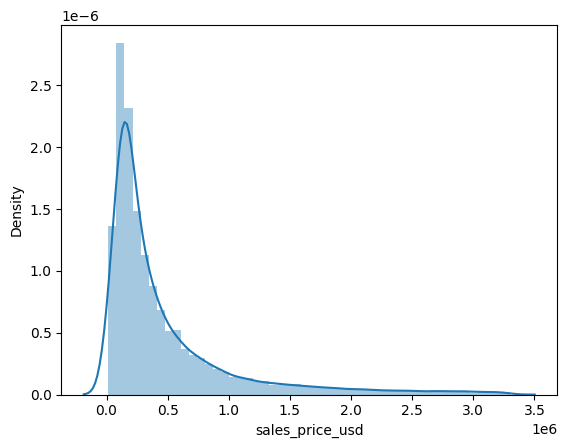

In [800]:
#Plot the distirbution of the sales price
sns.distplot(df_sold['sales_price_usd'])

# Trying it all with Alex's rules

In [801]:
# That is refreshing, what about now predicting the sales price?
# First, let's try to predict the sales price with the same features as before

#But keep only the rows where the piece is sold
df_sold = df[df['sold'] == 1]
df_sold = df_sold[(df_sold['sales_price_usd'] > df_sold['sales_price_usd'].quantile(0.05)) & (df_sold['sales_price_usd'] < df_sold['sales_price_usd'].quantile(0.95))]

X=df_sold[features_to_use] 
y=df_sold['sales_price_usd'] #Define target variable

###########
#Hot encode category -> all categories
X = pd.get_dummies(X, columns=['category'], drop_first=True)

#Hot encode auction house but only keep the ones that appear more than a 200 times, the rest mark as "other"
X['auction_house'] = np.where(X['auction_house'].str.contains('Christies'), 'Christies', X['auction_house'])
top_auction_houses = X['auction_house'].value_counts()[X['auction_house'].value_counts() > 200].index
X['auction_house'] = np.where(X['auction_house'].isin(top_auction_houses), X['auction_house'], 'other')
X = pd.get_dummies(X, columns=['auction_house'], drop_first=True)

#Hot encode country but only keep the ones that appear more than 250 times, the rest mark as "other"
top_countries = X['country'].value_counts()[X['country'].value_counts() > 250].index
X['country'] = np.where(X['country'].isin(top_countries), X['country'], 'other')   
X = pd.get_dummies(X, columns=['country'], drop_first=True)

#Hot encode artist, but only keep the ones that appear more than a 150 times, the rest mark as "other"
top_artists = X['artist'].value_counts()[X['artist'].value_counts() > 150].index
X['artist'] = np.where(X['artist'].isin(top_artists), X['artist'], 'other')
X = pd.get_dummies(X, columns=['artist'], drop_first=True)

###########

#Splitting the data into train, validation, and test sets
randomState=15095

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=randomState)

# Create model
from sklearn.ensemble import HistGradientBoostingRegressor

xgb = HistGradientBoostingRegressor(max_depth=4, random_state=randomState)

# Train model
xgb.fit(X_train, y_train.astype('int')) # XGBoost need the target variable to be binary in integer format

# Predict with test set
y_pred = xgb.predict(X_test)

# Calculate accuracy
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))



MSE:  62407954461.35072
R2:  0.8032803832315778


In [802]:
#Lets try a simple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#But keep only the rows where the piece is sold
df_sold = df[df['sold'] == 1]
df_sold = df_sold[(df_sold['sales_price_usd'] > df_sold['sales_price_usd'].quantile(0.05)) & (df_sold['sales_price_usd'] < df_sold['sales_price_usd'].quantile(0.95))]

df_sold = df_sold.replace([np.inf, -np.inf], np.nan)
df_sold.dropna(inplace=True)

X=df_sold[features_to_use] 
y=df_sold['sales_price_usd'] #Define target variable

###########
#Hot encode category -> all categories
X = pd.get_dummies(X, columns=['category'], drop_first=True)

#Hot encode auction house but only keep the ones that appear more than a 200 times, the rest mark as "other"
X['auction_house'] = np.where(X['auction_house'].str.contains('Christies'), 'Christies', X['auction_house'])
top_auction_houses = X['auction_house'].value_counts()[X['auction_house'].value_counts() > 200].index
X['auction_house'] = np.where(X['auction_house'].isin(top_auction_houses), X['auction_house'], 'other')
X = pd.get_dummies(X, columns=['auction_house'], drop_first=True)

#Hot encode country but only keep the ones that appear more than 250 times, the rest mark as "other"
top_countries = X['country'].value_counts()[X['country'].value_counts() > 250].index
X['country'] = np.where(X['country'].isin(top_countries), X['country'], 'other')   
X = pd.get_dummies(X, columns=['country'], drop_first=True)

#Hot encode artist, but only keep the ones that appear more than a 150 times, the rest mark as "other"
top_artists = X['artist'].value_counts()[X['artist'].value_counts() > 150].index
X['artist'] = np.where(X['artist'].isin(top_artists), X['artist'], 'other')
X = pd.get_dummies(X, columns=['artist'], drop_first=True)

###########
#Splitting the data into train, validation, and test sets
randomState=15095
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=randomState)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
        % r2_score(y_test, y_pred))


Coefficients: 
 [-3.59273258e-07 -8.53058718e+03 -8.92605873e-01 -1.90316144e+03
  1.92012368e+00 -4.62897882e+03 -1.26444158e+02 -2.93103461e+03
  1.23282176e+03  1.94186703e+02  8.11259286e+03 -3.20476551e+03]
Mean squared error: 26247800385.46
Coefficient of determination: 0.71


<AxesSubplot: xlabel='sales_price_usd', ylabel='Density'>

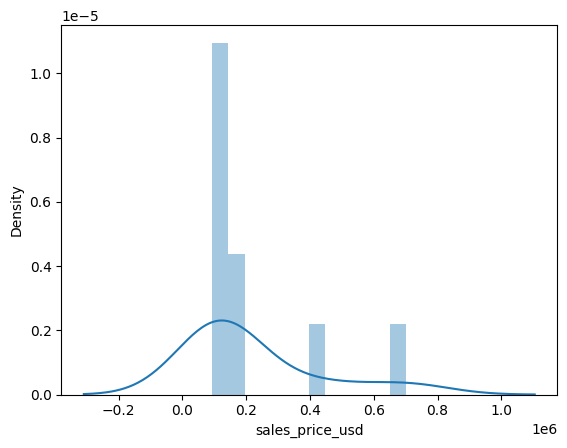

In [803]:
sns.distplot(df_sold['sales_price_usd'])

In [804]:
#get the sixe of the dataframe
X_train

,dated,height,high_estimate_usd,inscribed,low_estimate_usd,signed,stamped,width,aspect_ratio,area,category_print,category_sculpture
36670,1.0,17.32,390924.066520,1.0,359650.141199,0.0,0.0,13.19,1.31,228.45,1,0
31622,1.0,16.54,101640.257295,0.0,70366.331974,1.0,0.0,12.40,1.33,205.10,0,0
8392,1.0,10.83,32030.000000,0.0,19220.000000,1.0,0.0,11.77,0.92,127.47,0,1
40677,1.0,18.19,93821.775965,0.0,62547.850643,1.0,0.0,14.80,1.23,269.21,0,0
31638,1.0,15.20,109458.738626,0.0,78184.813304,0.0,0.0,20.79,0.73,316.01,1,0
31873,1.0,30.71,93821.775965,0.0,78184.813304,1.0,0.0,22.44,1.37,689.13,1,0
26498,1.0,40.20,196838.592233,1.0,131225.728155,0.0,1.0,43.30,0.93,1740.66,0,1


# Now all but with the Executive Dataset

In [14]:
###### Trying models with Alex's clen dataset
#import data
df = pd.read_csv('Cleaning/clustering_data.csv')

#But keep only the rows where the piece is sold
df_sold = df[df['sold'] == 1]

#df_sold = df_sold[(df_sold['sales_price'] > df_sold['sales_price'].quantile(0.05)) & (df_sold['sales_price'] < df_sold['sales_price'].quantile(0.95))]

y=df_sold['sales_price'] #Define target variable
X=df_sold.drop(['sales_price'], axis=1)

#Splitting the data into train, validation, and test sets
randomState=15095
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=randomState)

# Create model
from sklearn.ensemble import HistGradientBoostingRegressor

xgb = HistGradientBoostingRegressor(max_depth=4, random_state=randomState)

# Train model
xgb.fit(X_train, y_train.astype('int')) # XGBoost need the target variable to be binary in integer format

# Predict with test set
y_pred = xgb.predict(X_test)

# Calculate accuracy
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))


MSE:  1535824611289.8943
R2:  0.7316279202298144


In [24]:
#Lets try a simple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#import data
df = pd.read_csv('Cleaning/clustering_data.csv')

#But keep only the rows where the piece is sold
df_sold = df[df['sold'] == 1]
#Keep only the rows where the price is between the 5th and 95th percentile
df_sold = df_sold[(df_sold['sales_price'] > df_sold['sales_price'].quantile(0.05)) & (df_sold['sales_price'] < df_sold['sales_price'].quantile(0.95))]

#Drop low_estimate and high_estimate columns
#df_sold = df_sold.drop(['low_estimate', 'high_estimate'], axis=1)

y=df_sold['sales_price'] #Define target variable
X=df_sold.drop(['sales_price'], axis=1)

###########
#Splitting the data into train, validation, and test sets
randomState=15095
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=randomState)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
        % r2_score(y_test, y_pred))

Coefficients: 
 [-3.98485321e+03  4.85199819e+02 -3.38360488e+03 -8.52413360e+03
 -2.71955892e+04  7.14482928e+02 -3.47824569e+03 -5.18847771e+00
  6.11110318e-06  1.07381274e+00  6.04283612e-02  1.42567166e+05
 -5.01528009e+04  9.41704896e+04  4.88688260e+02  4.82046308e+02
 -6.25791390e+04  6.32083435e+04 -6.72469706e+03 -8.63829925e+04
  4.17284552e+03  1.28195990e+05  5.93194784e+04  2.10395421e+04
 -2.24456672e+04  8.19876185e+04  2.05689041e+04 -6.60212055e+04
 -2.61301280e+04 -2.95287412e+04 -2.91060496e+04  1.96761283e+04
  4.97476982e+04 -5.53369025e+04 -1.47226347e+04  6.05613167e+04
 -6.89004933e+04  9.82437270e+03  1.70603197e+03 -5.96271672e+03
 -1.99517053e+04 -3.87701218e+04 -1.95718079e+04  7.66355566e+03
  4.89793677e+04  5.60705721e+04 -7.65783119e+04  4.77505576e+02
 -6.50258661e+04 -7.75797565e+04  1.66198898e+04  5.78140261e+04
  1.83486971e+04 -1.42470064e+03 -3.16365123e+04 -4.48264936e+03
 -1.84952811e+04 -4.79070110e+04  9.35224371e+04  1.38138578e+04
 -1.74651

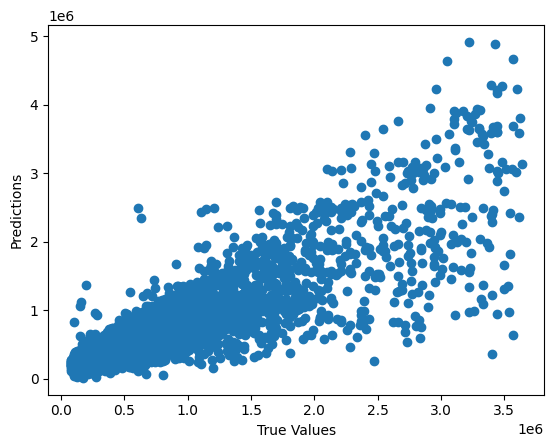

In [25]:
#Plot the results
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [17]:
#What is the range in the true values?
print('Range of true values: ', y_test.max(), ', ', y_test.min())

#What is the range in the predicted values?
print('Range of predicted values: ', y_pred.max(), ', ', y_pred.min())

Range of true values:  68399724.40450004 ,  1921.0
Range of predicted values:  47283584.11236954 ,  -163359.12187957764


,true_values,predicted_values,residuals
32940,5.115000e+05,9.931115e+05,-481611.512024
5518,7.945000e+05,8.283581e+05,-33858.072647
9237,6.246823e+05,3.246653e+05,300016.924817
40118,5.770000e+05,2.247183e+05,352281.654152
33149,1.022500e+06,1.834686e+06,-812186.402458
...,...,...,...
33223,1.783187e+05,1.858574e+05,-7538.746342
35378,2.280000e+05,1.708266e+05,57173.417114
33942,2.054393e+05,3.443085e+05,-138869.129773
4805,1.171320e+06,7.205077e+05,450812.256763


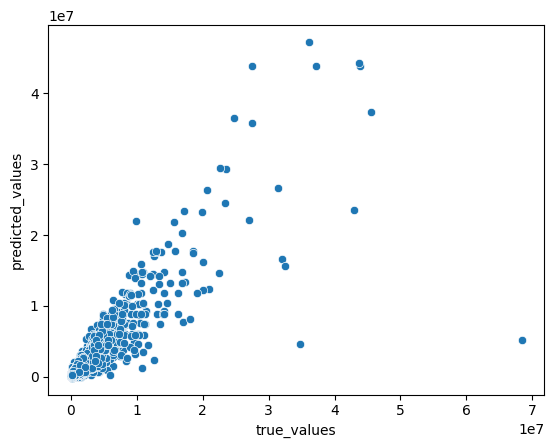

In [18]:
#Do a dataframe with the true values and the predicted values
df_pred = pd.DataFrame({'true_values': y_test, 'predicted_values': y_pred})

#plot df_pred
sns.scatterplot(x='true_values', y='predicted_values', data=df_pred)

#Calculate the residuals
df_pred['residuals'] = df_pred['true_values'] - df_pred['predicted_values']

df_pred


In [85]:
#what is the biggest residual
df_pred['residuals'].max()

3047394.9657727946

In [8]:
#To X_test, add a column with y_test and y_pred and residuals
X_test['y_test'] = y_test
X_test['y_pred'] = y_pred
X_test['residuals'] = X_test['y_test']-X_test['y_pred']

#Get the rows with the highest residuals
X_test.sort_values(by='residuals', ascending=True).head(10)

,dated,height,inscribed,signed,stamped,width,aspect_ratio,area,sold,low_estimate,...,mixed media,painting,paper,photograph,print,sculpture,other_category,y_test,y_pred,residuals
28221,1.0,32.68,0.0,0.0,0.0,25.20,1.30,823.54,1,1.958836e+06,...,0,0,1,0,0,0,0,6.095897e+05,2.494129e+06,-1.884539e+06
35950,0.0,40.00,0.0,1.0,0.0,3022.13,0.01,120885.20,1,6.000000e+05,...,0,1,0,0,0,0,0,6.350000e+05,2.349777e+06,-1.714777e+06
9557,0.0,80.91,0.0,1.0,0.0,59.25,1.37,4793.92,1,4.000000e+06,...,0,1,0,0,0,0,0,3.218500e+06,4.915103e+06,-1.696603e+06
32201,0.0,31.10,0.0,0.0,0.0,25.24,1.23,784.96,1,3.852913e+06,...,0,1,0,0,0,0,0,3.051685e+06,4.641595e+06,-1.589911e+06
20662,0.0,21.93,0.0,1.0,0.0,30.39,0.72,666.45,1,4.032872e+06,...,0,1,0,0,0,0,0,3.427941e+06,4.886915e+06,-1.458974e+06
12640,0.0,6.02,0.0,0.0,0.0,27.01,0.22,162.60,1,2.000000e+06,...,0,0,0,0,0,1,0,1.142500e+06,2.473683e+06,-1.331183e+06
32934,0.0,23.74,0.0,1.0,0.0,18.27,1.30,433.73,1,2.000000e+06,...,0,0,1,0,0,0,0,1.106500e+06,2.432231e+06,-1.325731e+06
17892,0.0,45.67,0.0,1.0,0.0,38.58,1.18,1761.95,1,2.000000e+06,...,0,0,1,0,0,0,0,1.205000e+06,2.485512e+06,-1.280512e+06
24289,0.0,39.37,0.0,1.0,0.0,31.89,1.23,1255.51,1,3.500000e+06,...,0,1,0,0,0,0,0,2.965000e+06,4.226030e+06,-1.261030e+06
33276,0.0,51.18,0.0,1.0,0.0,63.78,0.80,3264.26,1,1.034000e+06,...,0,1,0,0,0,0,0,1.974294e+05,1.368848e+06,-1.171419e+06


In [9]:
# Find correlated pairs
correlated_pairs = []
correlation_matrix = X_train.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            #add [i,j] to correlated pairs
           correlated_pairs.append([correlation_matrix.columns[i], correlation_matrix.columns[j]])
print(correlated_pairs)


[['area', 'height'], ['area', 'width'], ['high_estimate', 'low_estimate'], ['Austria', 'Egon Schiele'], ['Belgium', 'René Magritte'], ['Colombia', 'Fernando Botero'], ['Taiwan', 'Zhu (ju Ming) Ming'], ['Vietnam', 'Le Pho'], ['Sothebys', 'Christies'], ['paper', 'painting']]


In [10]:
import gurobipy

In [18]:
samples, dim = X_train.shape
dim
samples

29248

In [27]:
#Type of the columns in X_train
X_train.dtypes.value_counts()


int64      103
float64     10
dtype: int64

In [58]:
#Type of the columns in Y_train
y_train.dtypes

dtype('float64')

In [64]:
X_train.shape

(29248, 113)

In [65]:
regr.coef_.shape

(113,)

In [77]:
abs(y_train-X_train.dot(regr.coef_))

18846    2.668854e+05
20706    1.690033e+05
40889    1.461563e+06
28954    3.245981e+04
13750    1.124600e+05
             ...     
11197    9.397216e+05
26369    9.748624e+04
19790    4.168823e+04
18654    2.341370e+04
34135    3.897661e+04
Length: 29248, dtype: float64

In [76]:
#set environment for Gurobi
env = gurobipy.Env(empty=True)
env.setParam('OutputFlag', 0)
env.start()

#Set GRB
GRB = gurobipy.GRB

#Create optimization model
m = gurobipy.Model()

#Create variables
beta = m.addVars(113, name="beta")

#Set objective
m.setObjective(sum(y_train-X_train.dot(beta)), GRB.MINIMIZE)

#Optimize model
m.optimize()


IndexError: tuple index out of range

<AxesSubplot: xlabel='low_estimate', ylabel='Density'>

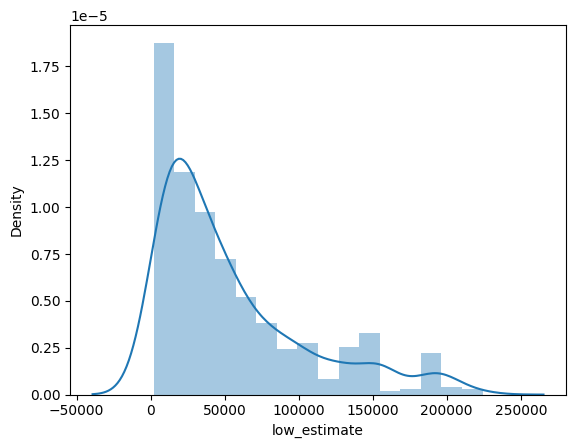

In [31]:
df_unsold = df[df['sold'] == 0]
#Keep only the rows where the price is between the 5th and 95th percentile
df_unsold = df_unsold[(df_unsold['low_estimate'] > df_unsold['low_estimate'].quantile(0.00)) & (df_unsold['low_estimate'] < df_unsold['low_estimate'].quantile(0.80))]

sns.distplot(df_unsold['low_estimate'])